<a href="https://colab.research.google.com/github/chikilepraneeth/STATS/blob/main/wine_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt




In [10]:
data = load_wine()

data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [11]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

In [13]:
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [15]:
df.loc[np.random.choice(df.index, 10), 'alcohol'] = np.nan

In [16]:
print("Missing values before imputation:\n", df.isnull().sum())

Missing values before imputation:
 alcohol                         10
malic_acid                       0
ash                              0
alcalinity_of_ash                0
magnesium                        0
total_phenols                    0
flavanoids                       0
nonflavanoid_phenols             0
proanthocyanins                  0
color_intensity                  0
hue                              0
od280/od315_of_diluted_wines     0
proline                          0
target                           0
dtype: int64


In [17]:
df['alcohol'].fillna(df['alcohol'].mean(), inplace=True)

<ipython-input-17-a9b30de2888a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alcohol'].fillna(df['alcohol'].mean(), inplace=True)


In [19]:
print("Missing values after imputation:\n", df.isnull().sum())

Missing values after imputation:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
s_df = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=data.feature_names)

print(s_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.526226   -0.562250  0.232053          -1.169593   1.913905   
1  0.212828   -0.499413 -0.827996          -2.490847   0.018145   
2  0.161822    0.021231  1.109334          -0.268738   0.088358   
3  1.704746   -0.346811  0.487926          -0.809251   0.930918   
4  0.263833    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

In [21]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
n_df = pd.DataFrame(minmax_scaler.fit_transform(df.iloc[:, :-1]), columns=data.feature_names)

print(n_df.head())


    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.372014  0.455285                      0.970696  0.561341  
1         0.264505  0.463415

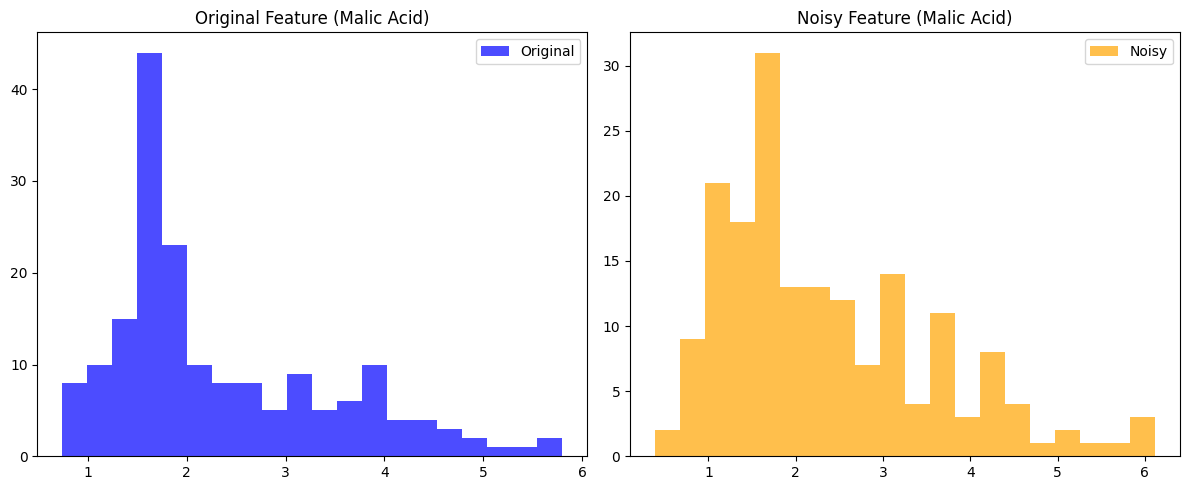

In [22]:

noise = np.random.normal(0, 0.5, size=df.shape[0])
df['malic_acid_noisy'] = df['malic_acid'] + noise

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['malic_acid'], bins=20, color='blue', alpha=0.7, label='Original')
plt.title('Original Feature (Malic Acid)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['malic_acid_noisy'], bins=20, color='orange', alpha=0.7, label='Noisy')
plt.title('Noisy Feature (Malic Acid)')
plt.legend()

plt.tight_layout()
plt.show()


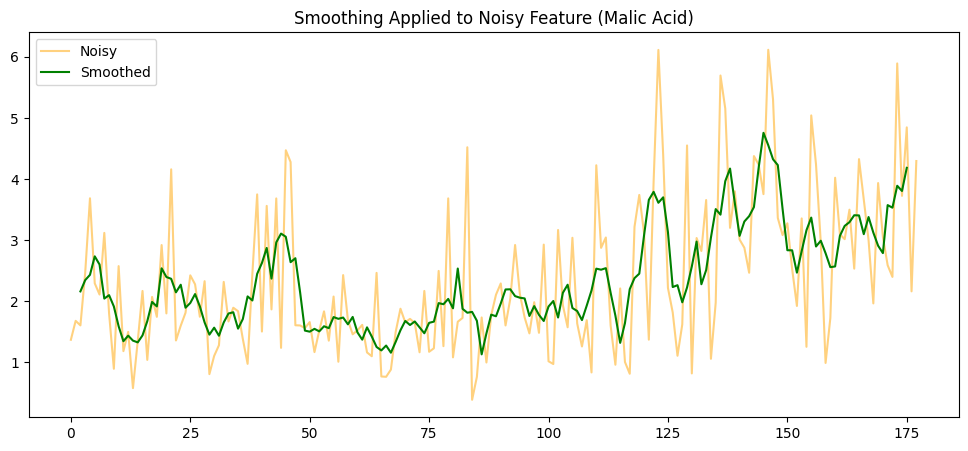

In [23]:
df['malic_acid_smoothed'] = df['malic_acid_noisy'].rolling(window=5, center=True).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['malic_acid_noisy'], label='Noisy', color='orange', alpha=0.5)
plt.plot(df['malic_acid_smoothed'], label='Smoothed', color='green')
plt.title('Smoothing Applied to Noisy Feature (Malic Acid)')
plt.legend()
plt.show()


In [24]:
from scipy.stats import zscore

z_scores = zscore(df['alcohol'])
outliers = np.where(np.abs(z_scores) > 3)

print(f"Outliers detected at indices: {outliers[0]}")


Outliers detected at indices: []


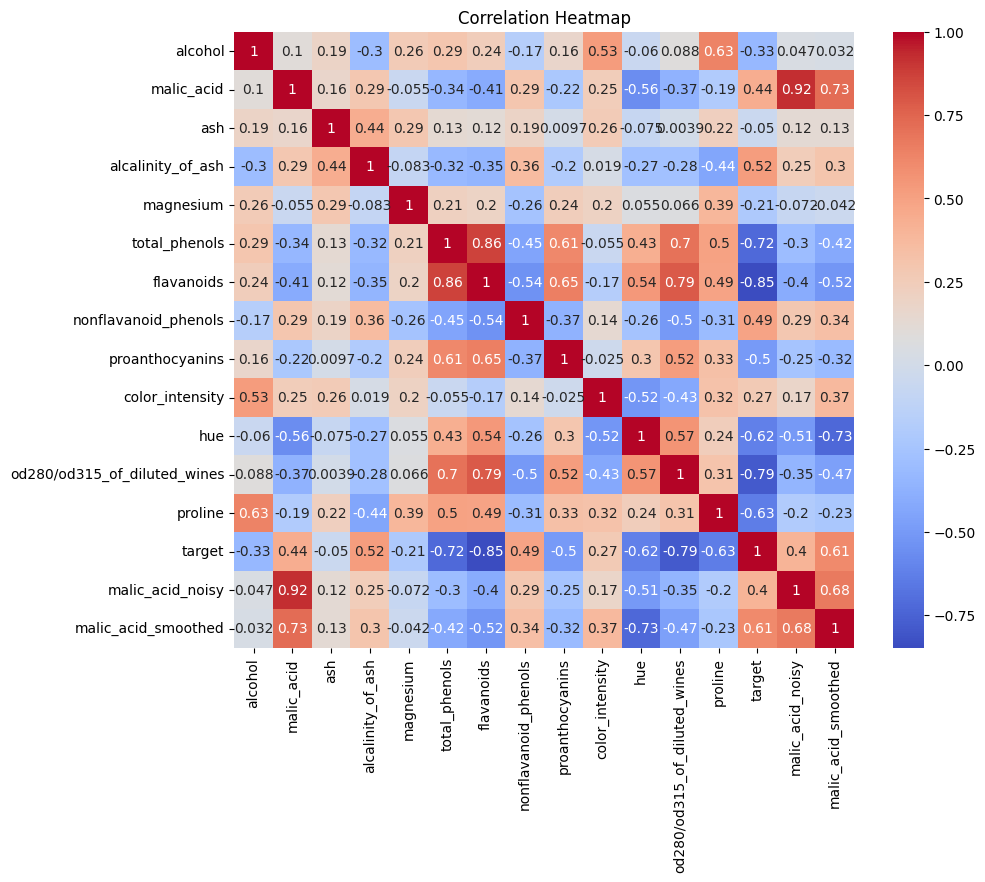

In [25]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [26]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = df.iloc[:, :-1]
y = df['target']

model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected Features using RFE:", selected_features)


Selected Features using RFE: Index(['flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines',
       'proline', 'target'],
      dtype='object')


In [27]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)

lasso_features = X.columns[lasso.coef_ != 0]
print("Selected Features using Lasso:", lasso_features)


Selected Features using Lasso: Index(['alcalinity_of_ash', 'flavanoids', 'color_intensity', 'proline',
       'target'],
      dtype='object')
